In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
rc("figure", dpi=120, figsize=(6,4.8))

In [8]:
from cosmoslik import *

These files are attached to a [Release](https://github.com/marius311/hubblehunters/releases) on the Github page for this repo:

In [14]:
planck = load_cosmomc_chain("dat/plikHM_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE");
lowl   = load_cosmomc_chain("dat/pliklite_TT_lowl_lmax801_lowE/base_pliklite_TT_lowl_lmax801_lowE")
highl  = load_cosmomc_chain("dat/pliklite_TT_lmin802_lowE/base_pliklite_TT_lmin802_lowE")

In [15]:
directH0 =  (74.03, 1.42)

In [16]:
αBAO,σαBAO = 0.2954, 0.004055

In [17]:
rs = linspace(130,160)

In [18]:
rc("mathtext", fontset="cm")

/home/marius/work/cosmoslik/cosmoslik/chains.py:431: MatplotlibDeprecationWarning: The movavg function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  xem, yem = movavg(xe,2), movavg(ye,2)


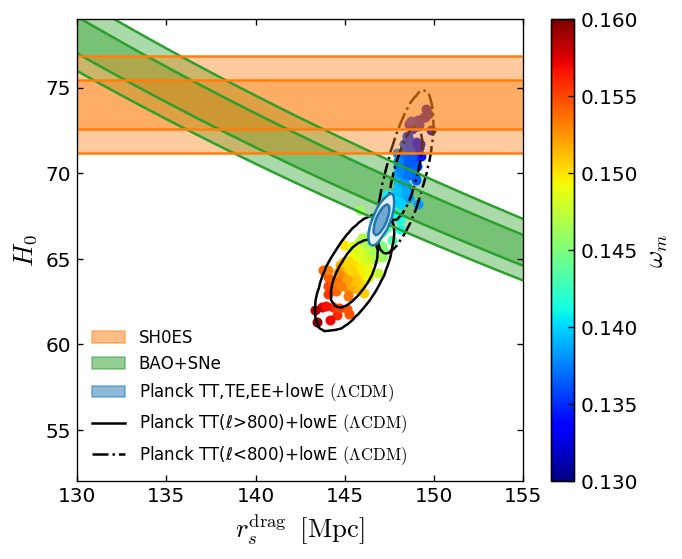

In [19]:
figure(figsize=(6,5))

# bao.join().like2d("rstar*","H0*", nbins=25, smooth=0.9, c="C3")

for nσ in (1,2):
    fill_between(rs, *(2.998e3/((αBAO+x*nσ*σαBAO)*rs) for x in (-1,1)), alpha=0.4, color="C2", lw=0, zorder=-1)
    for x in (-1,1):
        plot(rs, 2.998e3/((αBAO+x*nσ*σαBAO)*rs), color="C2", zorder=1)
    

planck.join().like2d("rdrag*","H0*", nbins=25, smooth=0.9, c="C0", zorder=2)

lowl.join().like2d("rdrag*","H0*", nbins=25, smooth=0.9, c="k", linestyles="-.", filled=False, zorder=1)
_,cax = lowl.join().likepoints("rdrag*","H0*","omegamh2*", npoints=100, zorder=1, cmap=get_cmap("jet"), clim=(0.13,0.16))

highl.join().like2d("rdrag*","H0*", nbins=25, smooth=0.9, c="k", linestyles="-", filled=False, zorder=1)
highl.join().likepoints("rdrag*","H0*","omegamh2*", npoints=100, zorder=1, cmap=get_cmap("jet"), cax=cax, clim=(0.13,0.16))



for x in [1,2]:
    fill_between(xlim(), *[[directH0[0] + a*x*directH0[1]] for a in [-1,1]], color="C1", alpha=0.4, lw=0)
    for a in [-1,1]:
        plot(xlim(), [directH0[0] + a*x*directH0[1]]*2, color="C1")
    
xlabel(r"$r_s^{\rm drag} \;\; [\rm Mpc]$")
ylabel(r"$H_0$")

xlim(130,155)
ylim(52,79)

from matplotlib.patches import Patch

legend_elements = [
    
    Patch(color="C1", alpha=0.5, label="SH0ES"),
    Patch(color="C2", alpha=0.5, label="BAO+SNe"),
    Patch(color="C0", alpha=0.5, label=r"Planck TT,TE,EE+lowE $(\Lambda \rm CDM)$"),
    Line2D([0],[0],c="k", label=r"Planck TT(ℓ>800)+lowE $(\Lambda \rm CDM)$"),
    Line2D([0],[0],c="k", label=r"Planck TT(ℓ<800)+lowE $(\Lambda \rm CDM)$", ls="-.")
]

cax.set_ylabel("$\omega_m$")

legend(handles=legend_elements, loc="lower left", fontsize=10)
savefig("paper/Figures/rs-H0.pdf", bbox_inches="tight")